main goal:

divide N assets into k class. (k is random..)

consider inner and outer relationship of the portfolio.

sometimes may need sub-clustering:)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clean_data.csv', sep = ',', index_col = 0)

In [3]:
N = 100; # number of time series
T = 200  # time length
q = N/T  # ratio

In [4]:
price = data.iloc[0:T+1, 0:N]
ret = np.log(price).diff()[1:]
corr_ret = np.corrcoef(ret.T)

In [5]:
u, v = np.linalg.eig(corr_ret)

In [6]:
lambda_plus = (1 + np.sqrt(q))**2

In [7]:
def compute_C_minus_C0(lambdas, v, lambda_plus):
    # lambdas is a vector
    # v is an eigenvector matrix
    C_r = np.dot(np.dot(v[:,lambdas < lambda_plus], np.diag(lambdas[lambdas < lambda_plus])), v[:,lambdas < lambda_plus].T)
    C_M = lambdas.max() * np.dot(v[:, lambdas.argmax()], v[:, lambdas.argmax()].T)
    C_0 = C_r + C_M
    C = np.dot(np.dot(v, np.diag(lambdas)), v.T)
    return C - C_0

In [8]:
import community 
import networkx as nx
import matplotlib.pyplot as plt

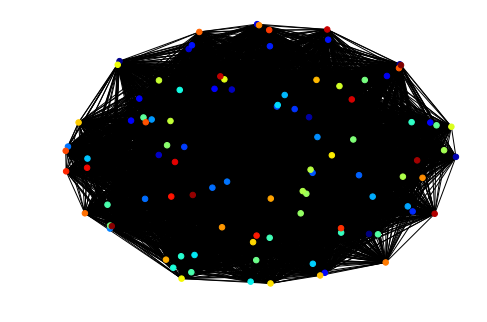

In [10]:
C_s = np.abs(compute_C_minus_C0(u, v, lambda_plus))
G = nx.Graph(C_s)
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)


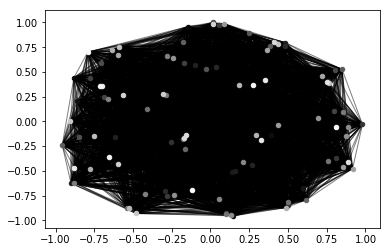

In [11]:
G = nx.Graph(C_s)
partition  = community.best_partition(G)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()